In [ ]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt
!pip install roboflow

fatal: destination path 'YOLOv6' already exists and is not an empty directory.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-8.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8cEtBWFmdUHLgHGMClLP")
project = rf.workspace("micrography-ipua2").project("micrography")
dataset = project.version(1).download("mt-yolov6")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-8.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Micrography-1 in mt-yolov6:: 100%|██████████| 5247/5247 [00:03<00:00, 1701.13it/s]


In [ ]:
# run this cell to begin training
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='/content/YOLOv6/Micrography-1/data.yaml', device='0', dist_url='env://', epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp', workers=8, world_size=1)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 2266/2266 [00:00<00:00, 5211.14it/s]
Train: Checking formats of labels with 2 process(es): 
2266 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 2266/2266 [00:00<00:00, 4739.46it/s]
Train: Final numbers of valid images: 2266/ labels: 2266. 
1.1s for dataset initialization.
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 231/231 [00:00<00:00, 2995.51it/s]
Val: Checking formats of labels wit

In [ ]:
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --device 0 


Namespace(batch_size=32, conf_thres=0.001, data='/content/YOLOv6/Micrography-1/data.yaml', device='0', half=False, img_size=416, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.62
Val: Checking formats of labels with 2 process(es): 
231 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 231/231 [00:00<00:00, 3556.86it/s]
Convert to COCO format
100% 231/231 [00:00<00:00, 81037.49it/s]
Convert to COCO format finished. Resutls saved in Microgr

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/ --device 0


Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='/content/YOLOv6/Micrography-1/images/test/', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Micrography-1/data.yaml')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 121/121 [00:03<00:00, 38.53it/s]
Results saved to runs/inference/exp


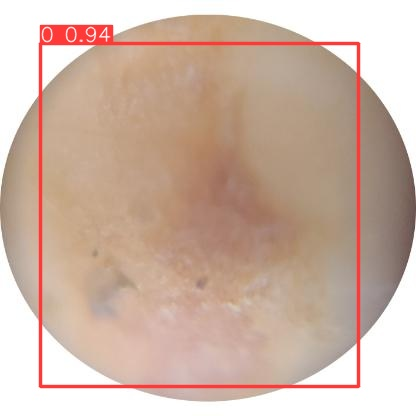

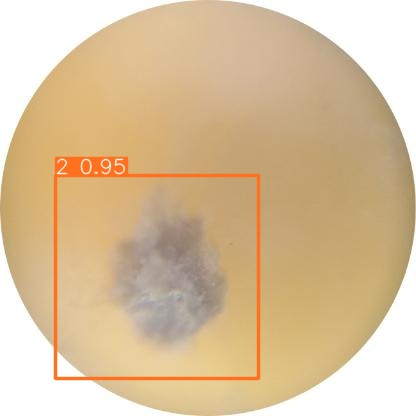

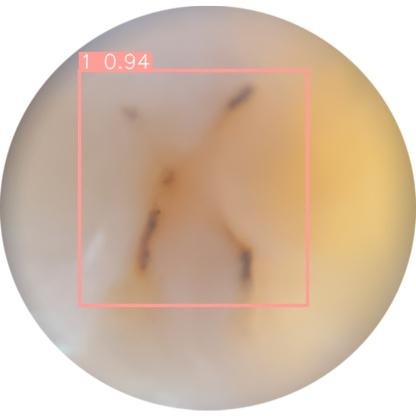

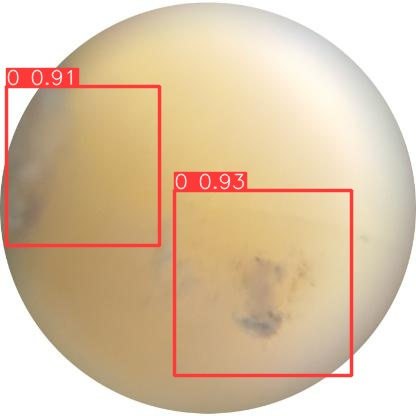

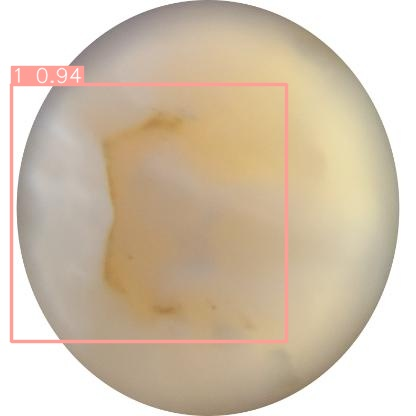

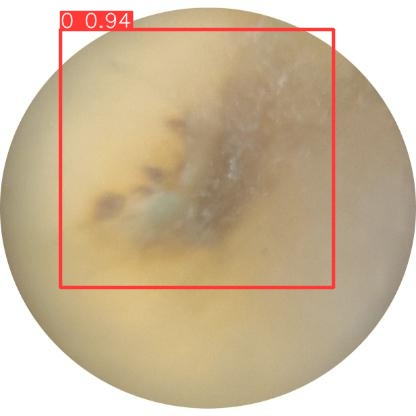

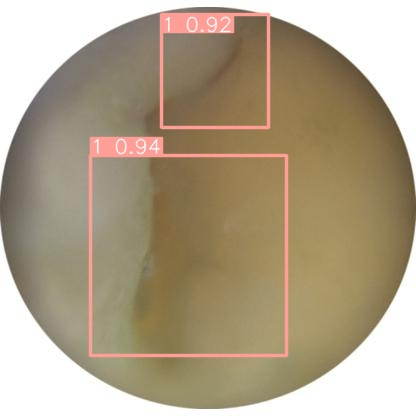

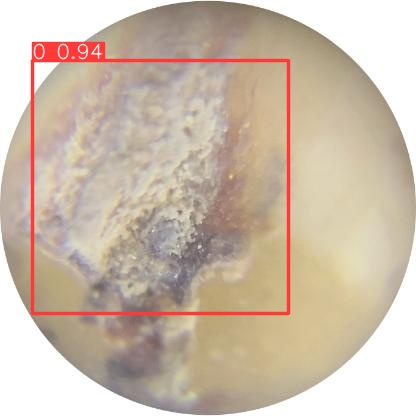

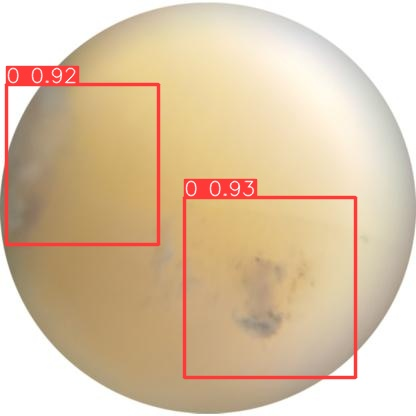

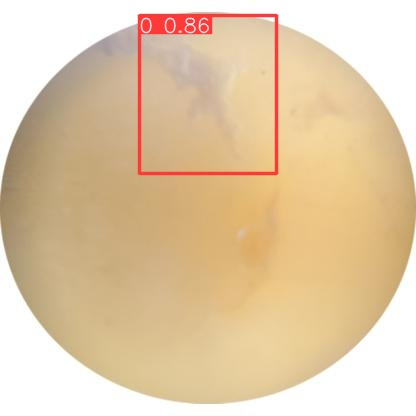

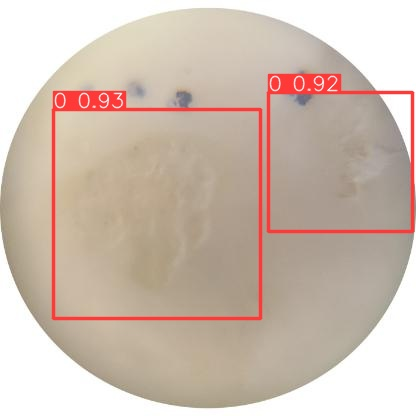

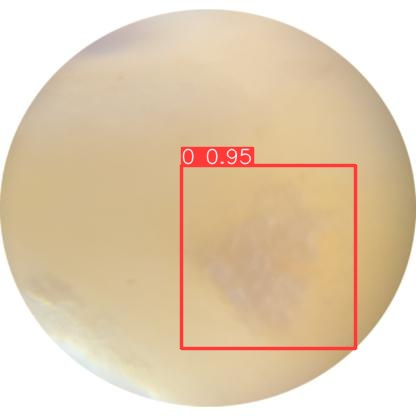

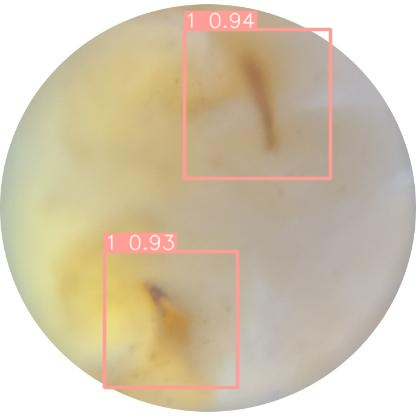

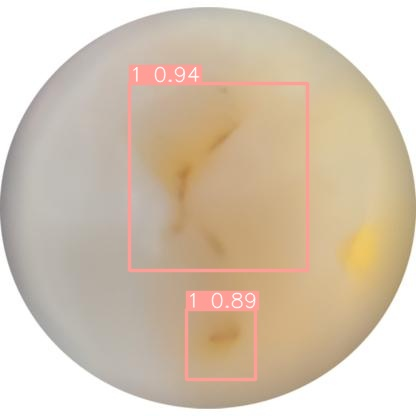

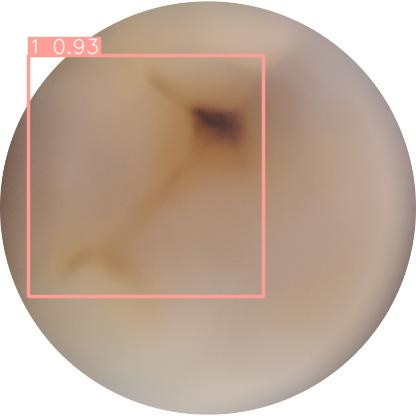

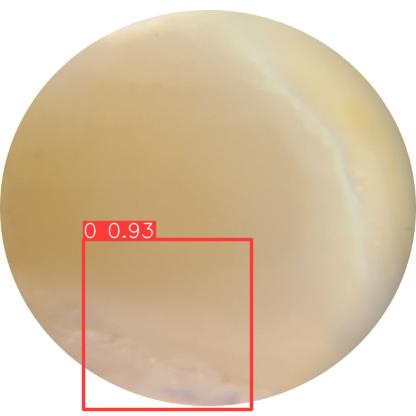

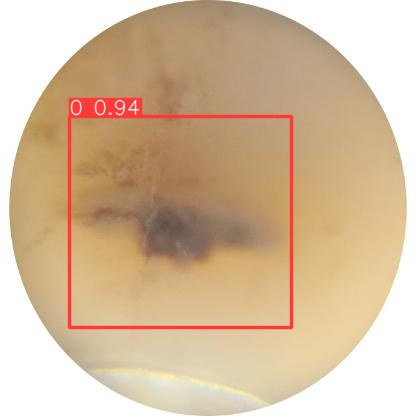

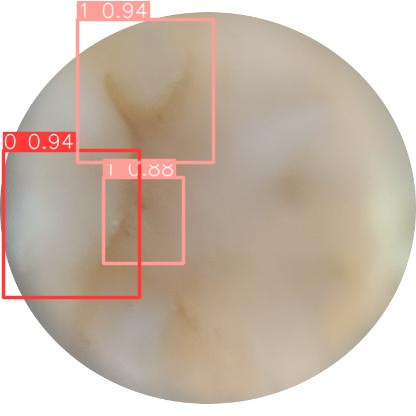

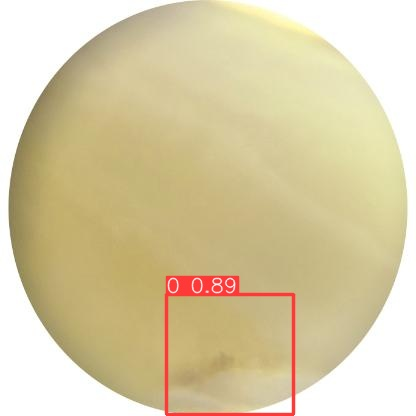

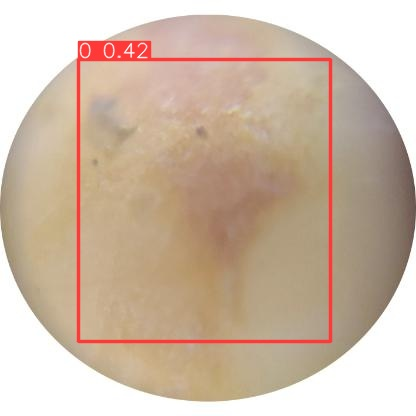

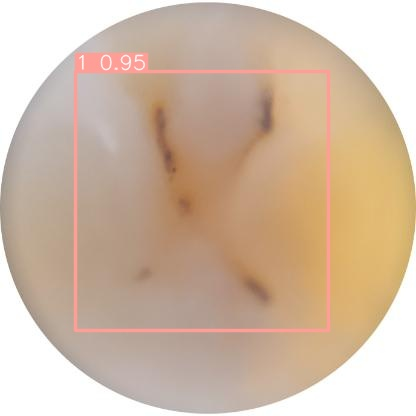

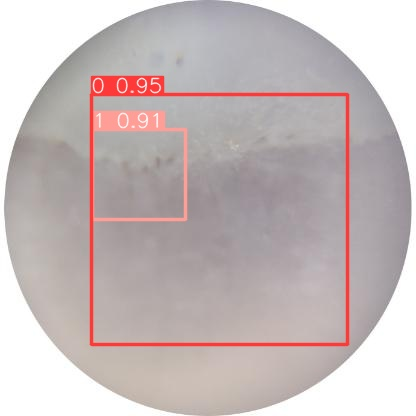

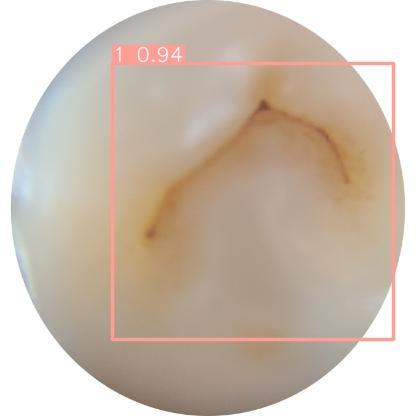

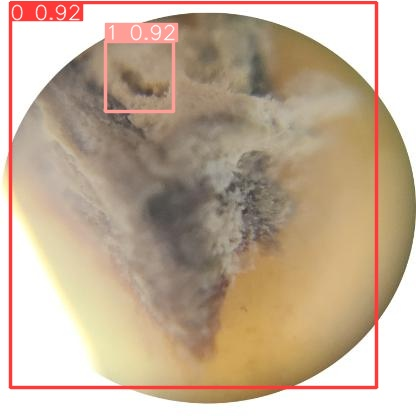

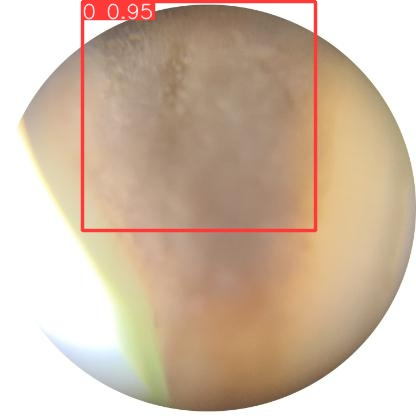

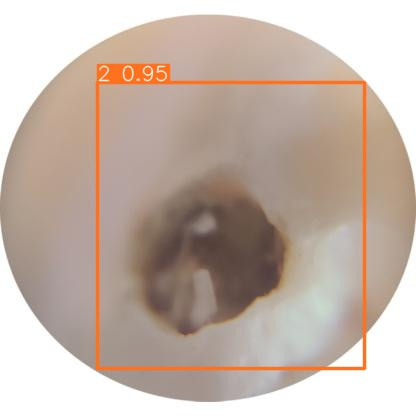

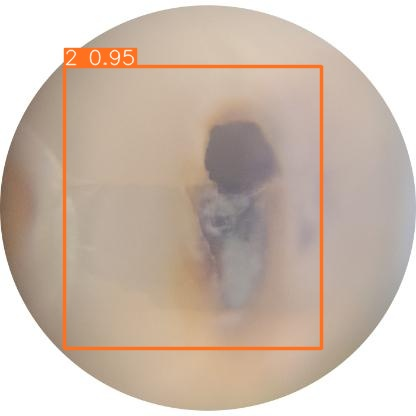

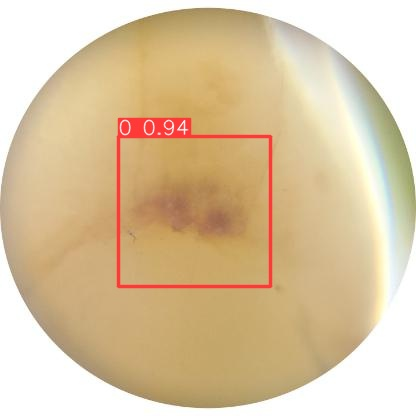

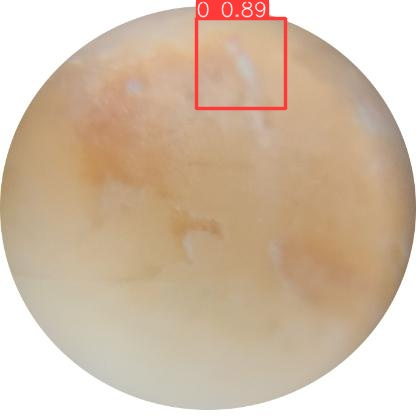

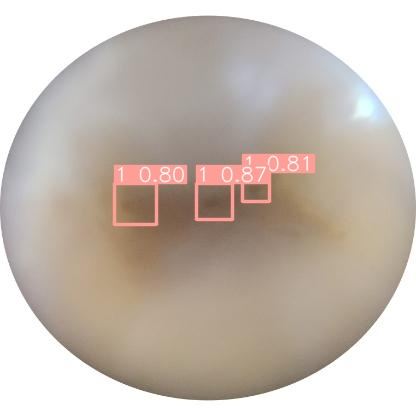

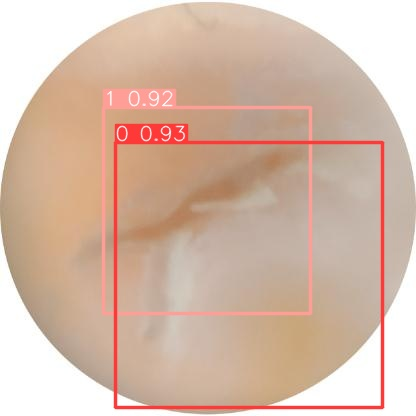

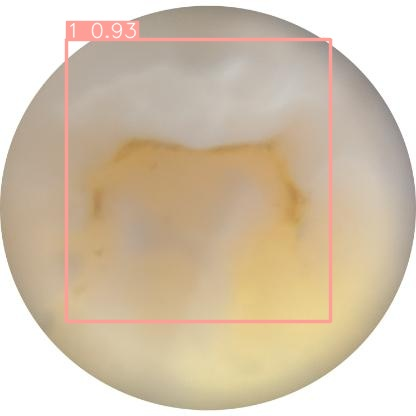

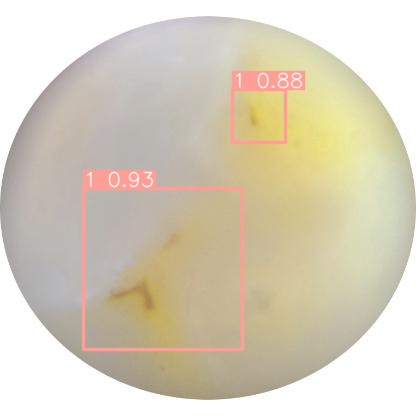

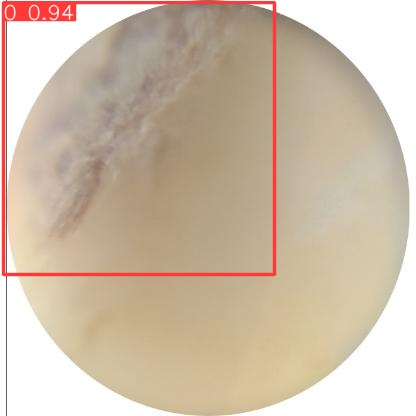

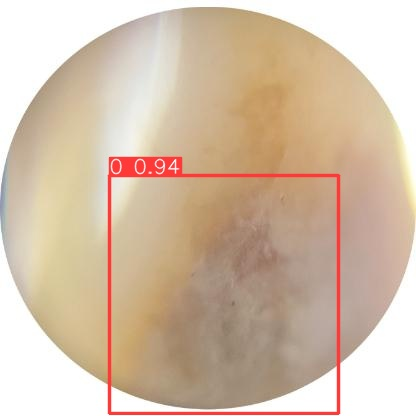

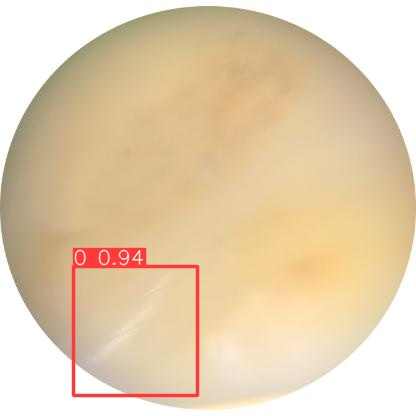

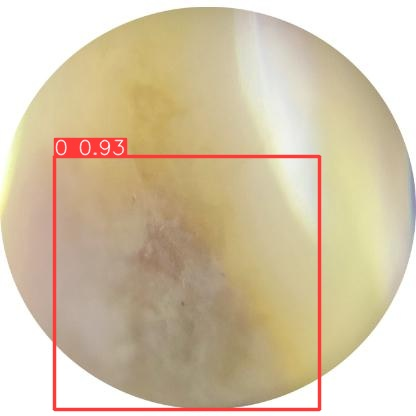

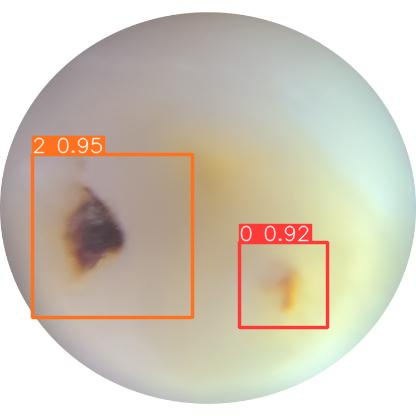

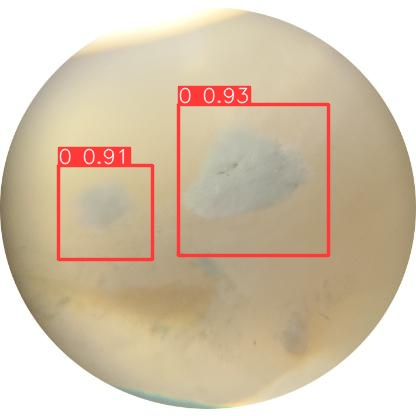

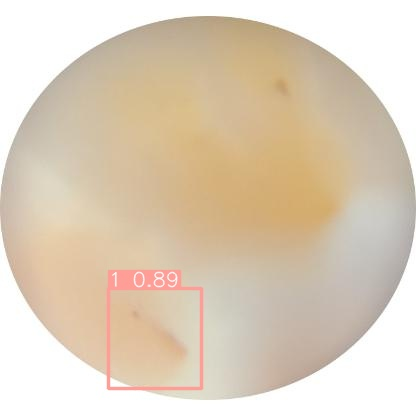

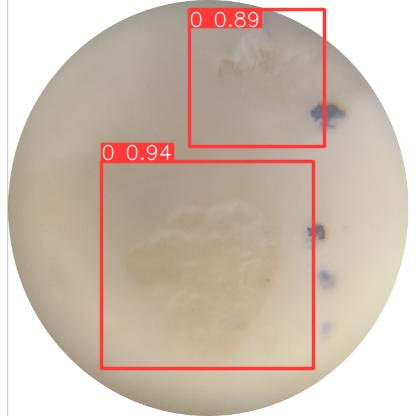

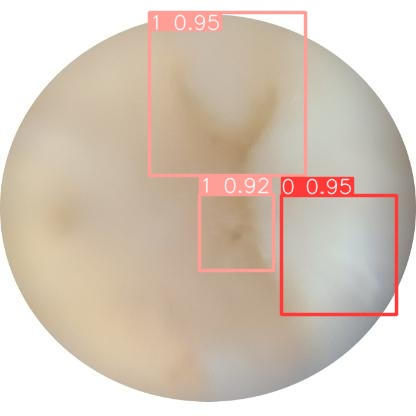

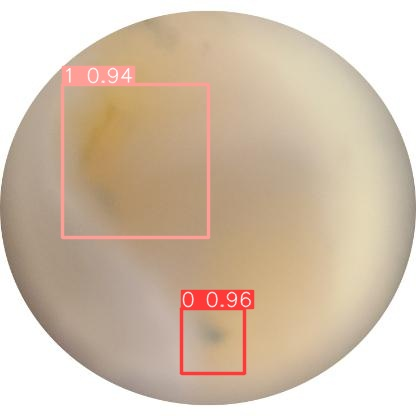

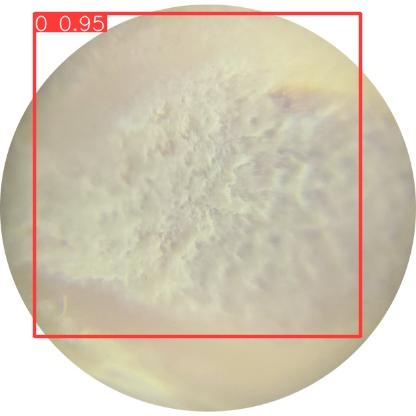

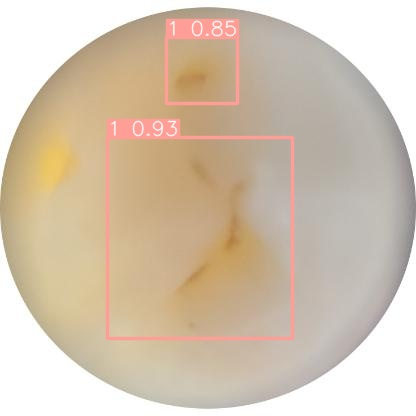

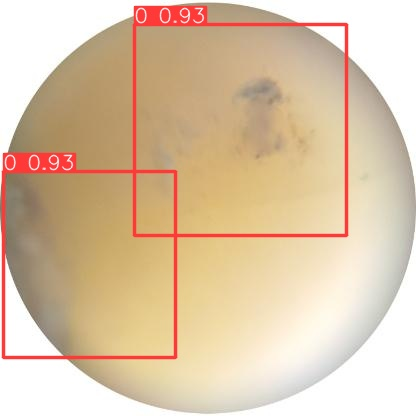

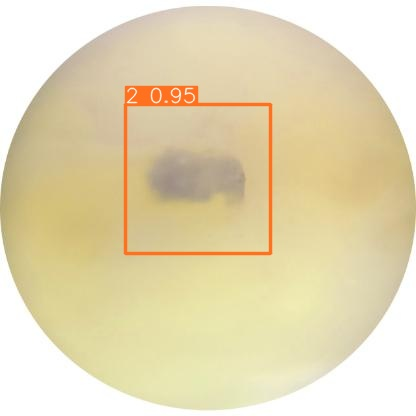

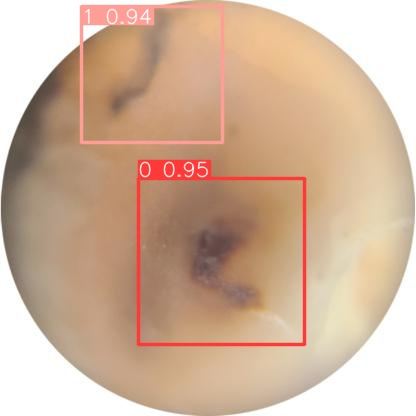

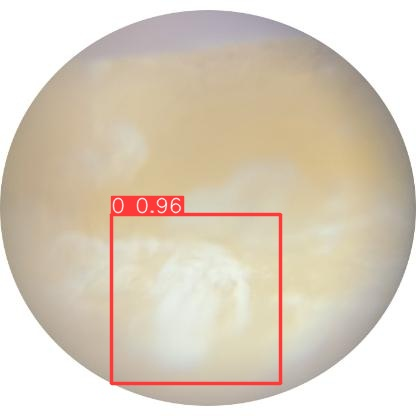

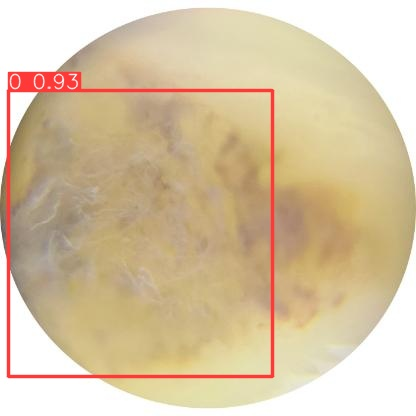

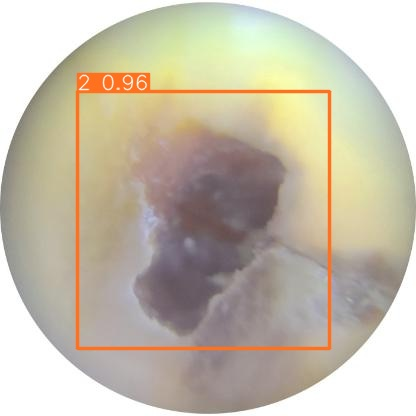

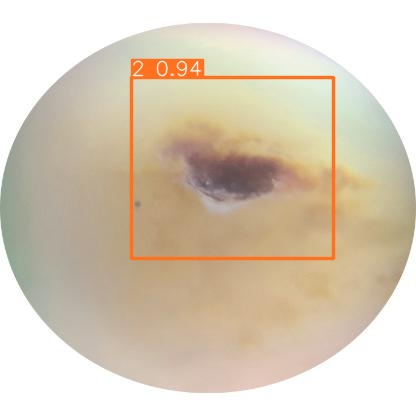

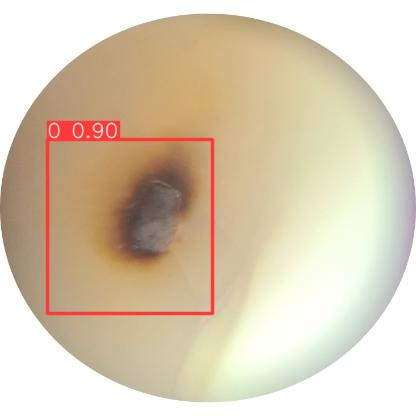

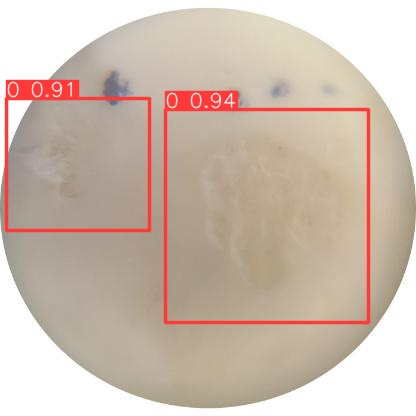

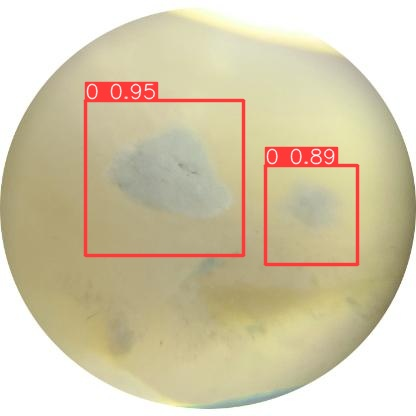

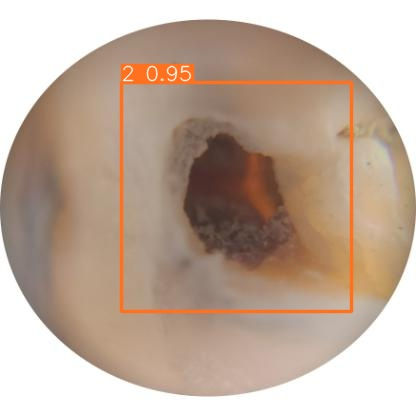

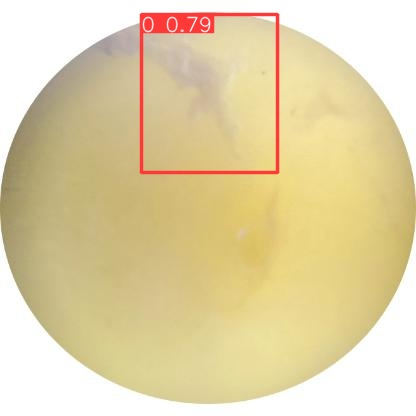

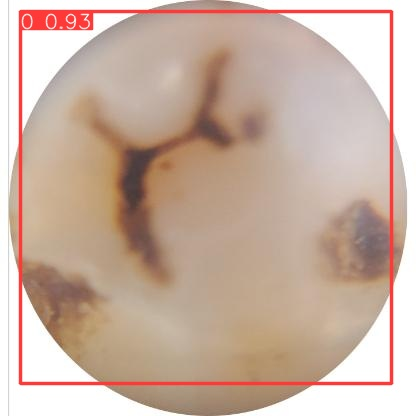

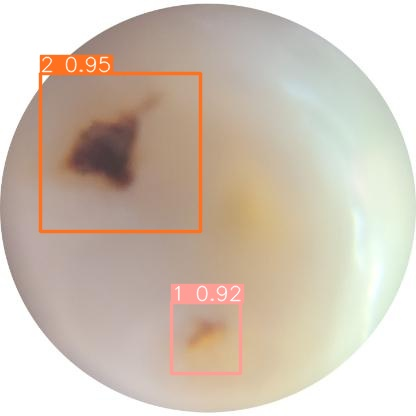

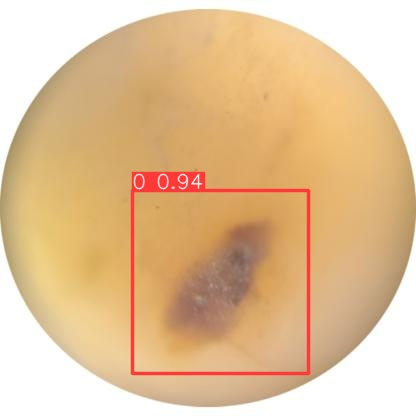

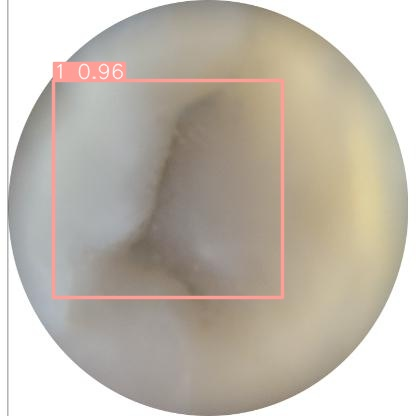

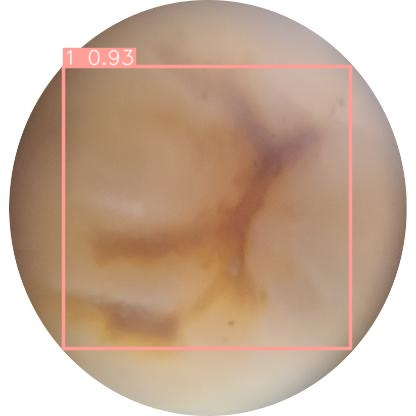

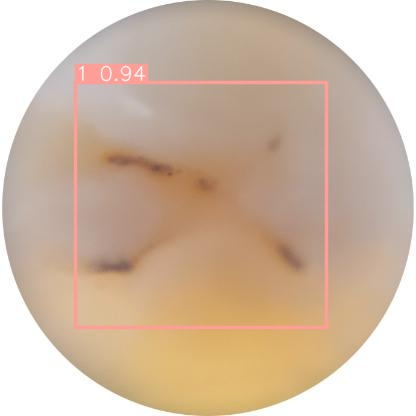

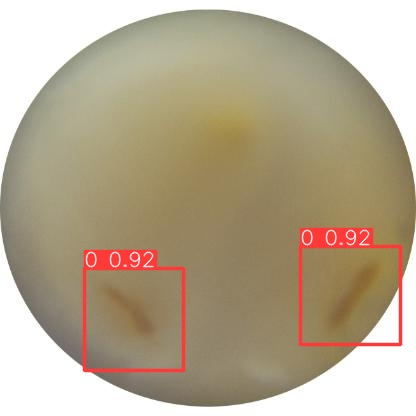

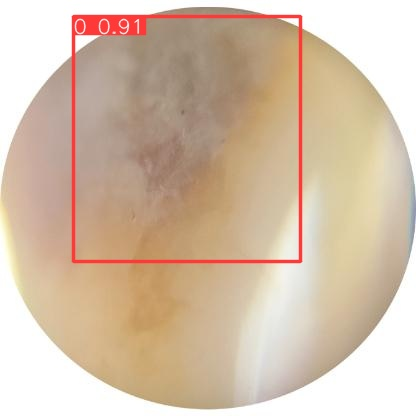

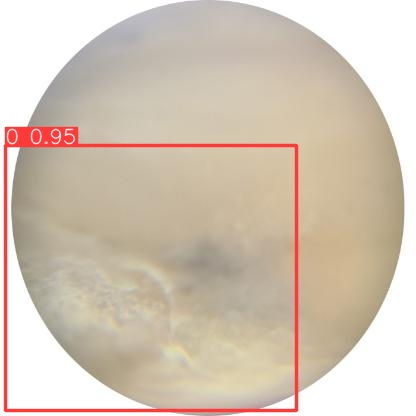

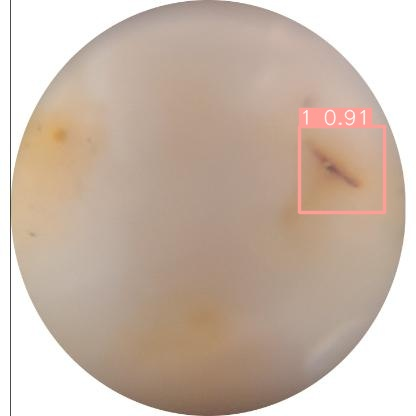

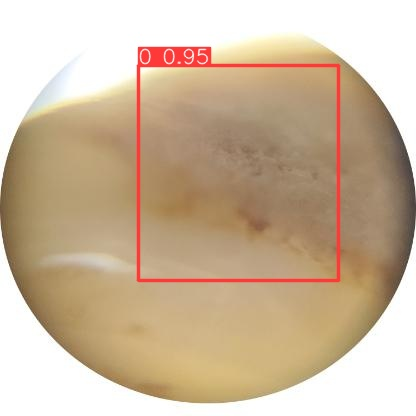

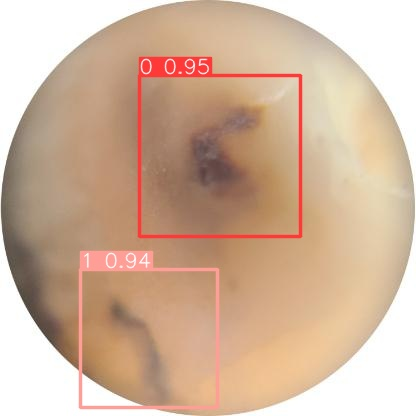

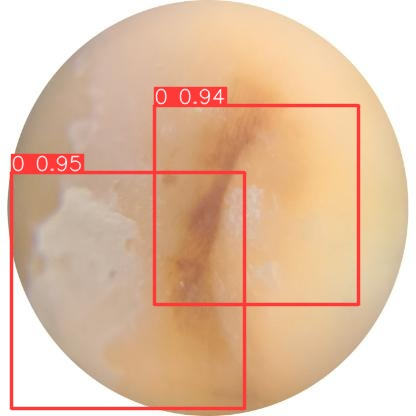

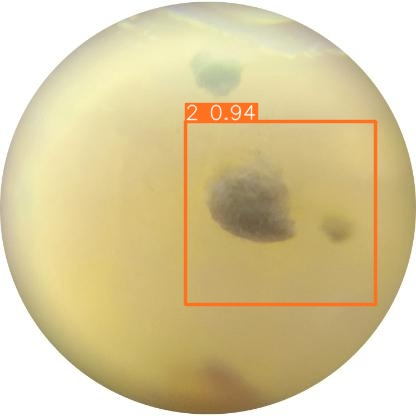

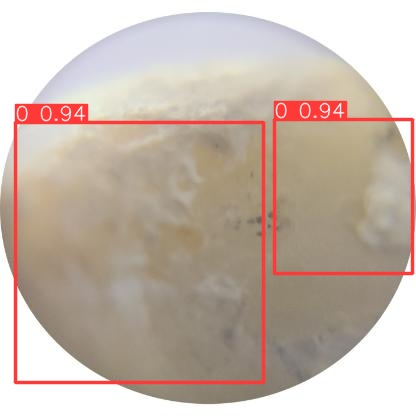

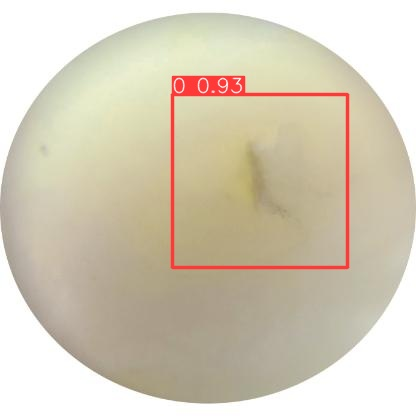

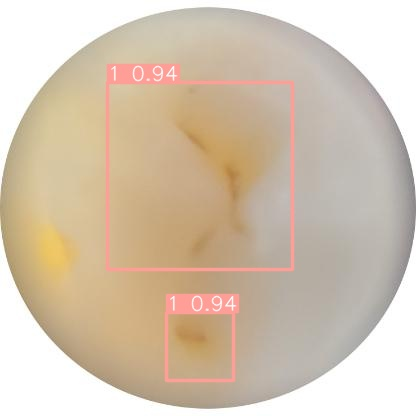

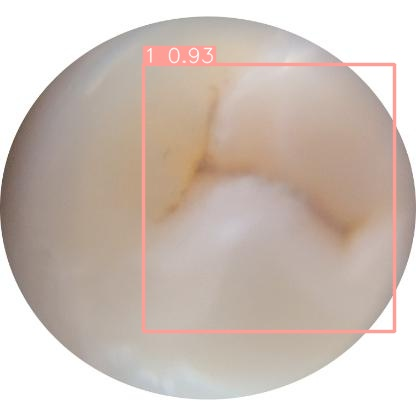

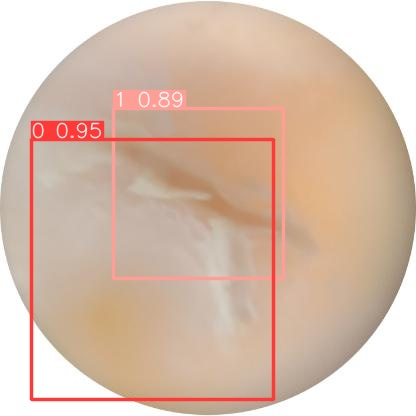

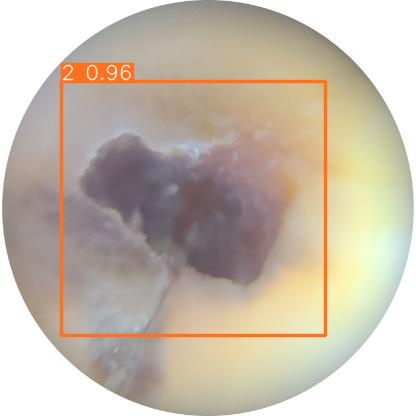

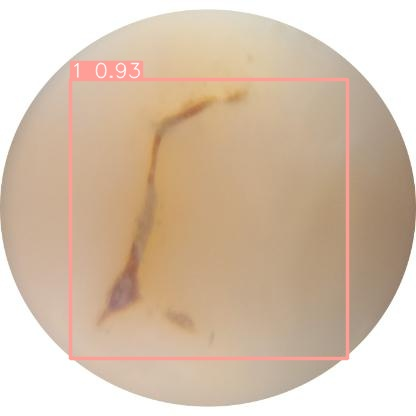

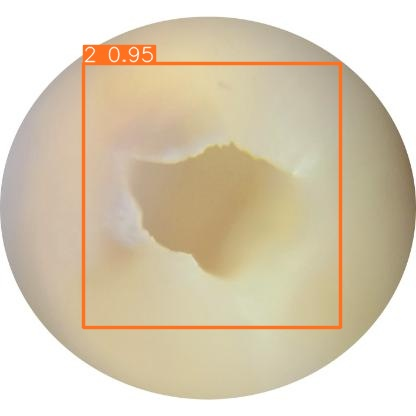

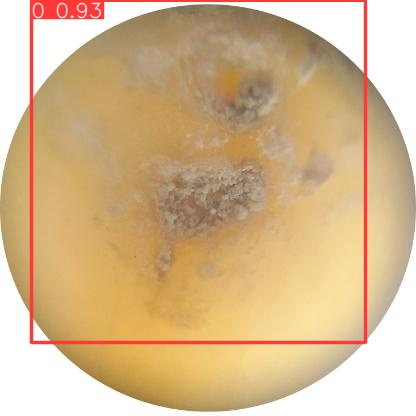

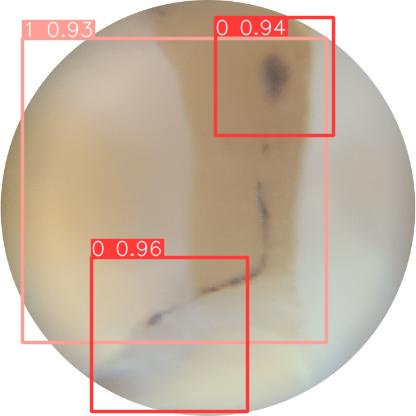

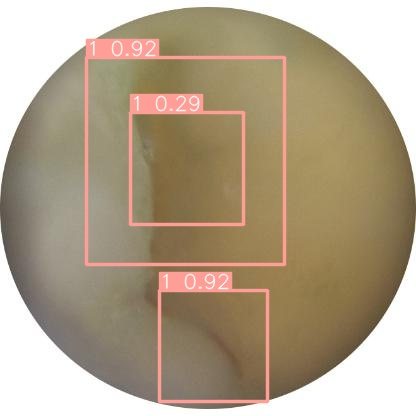

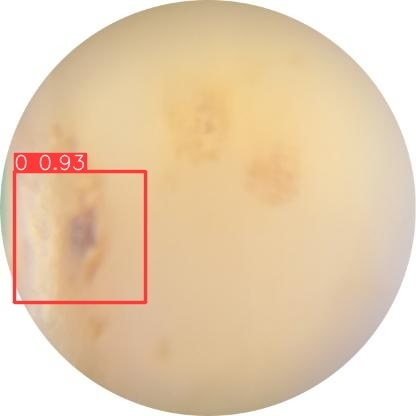

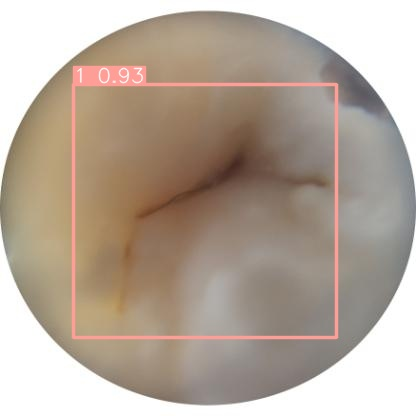

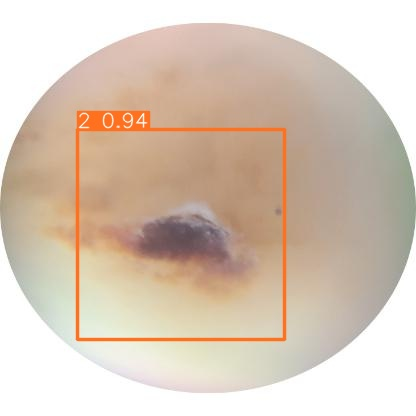

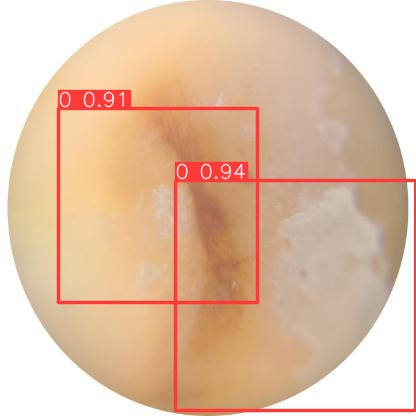

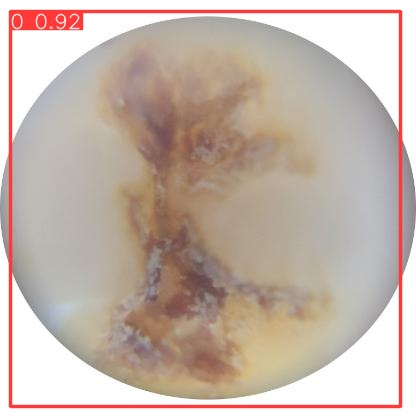

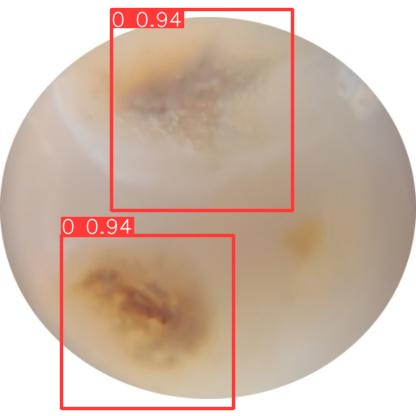

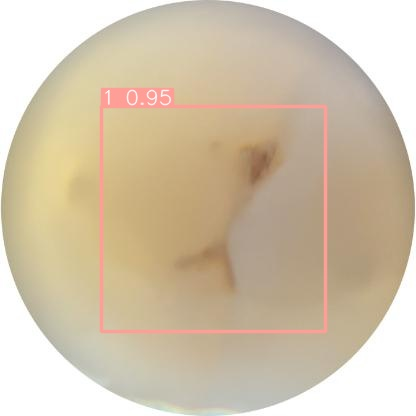

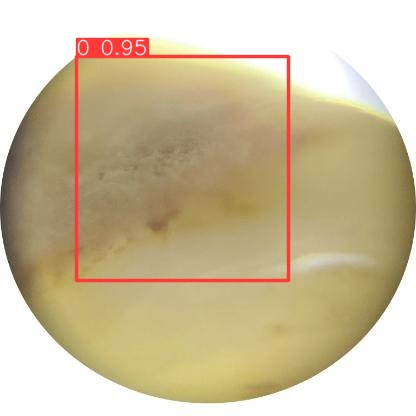

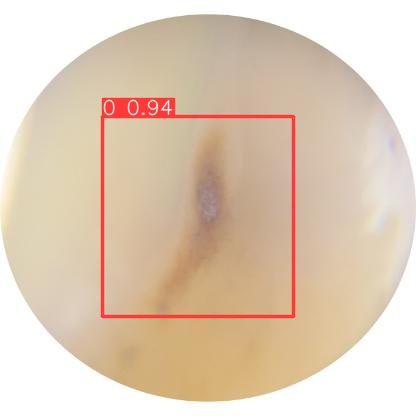

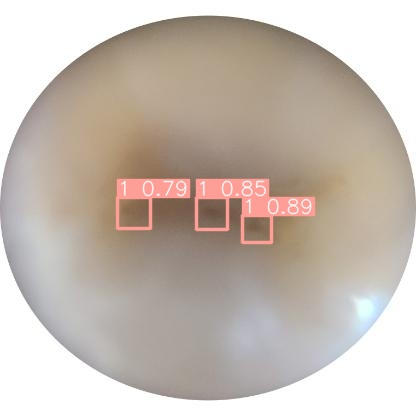

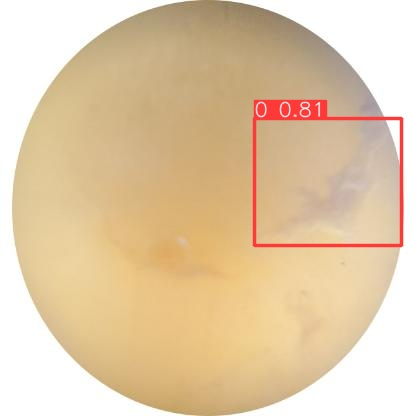

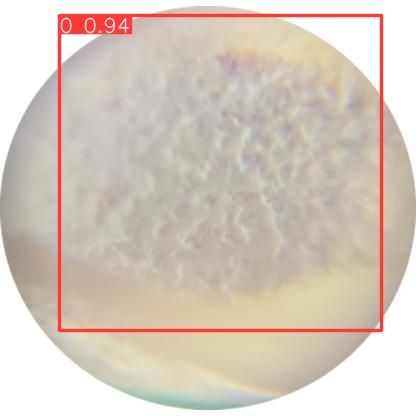

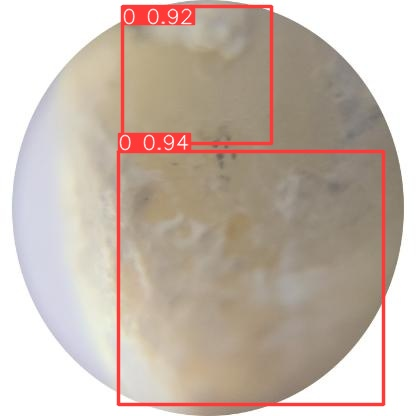

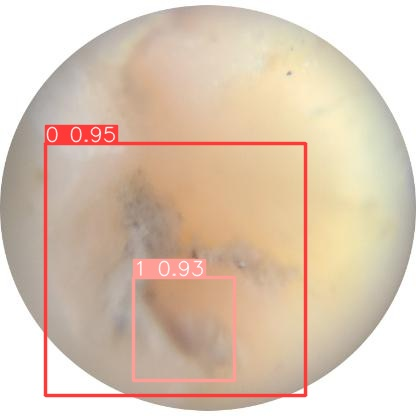

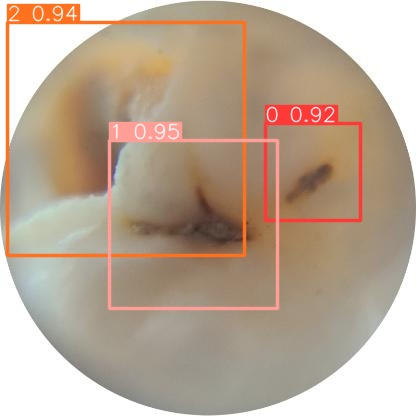

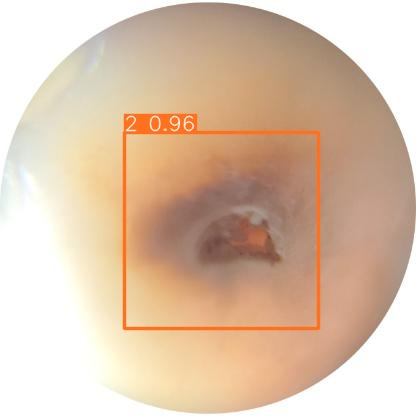

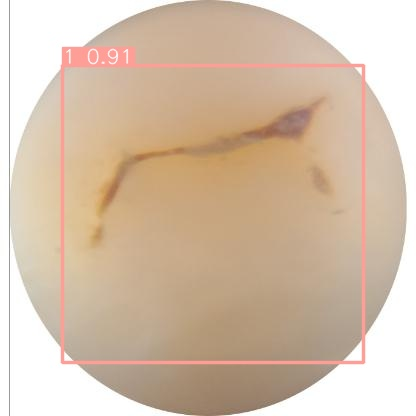

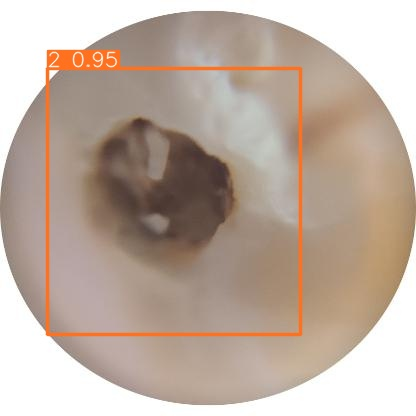

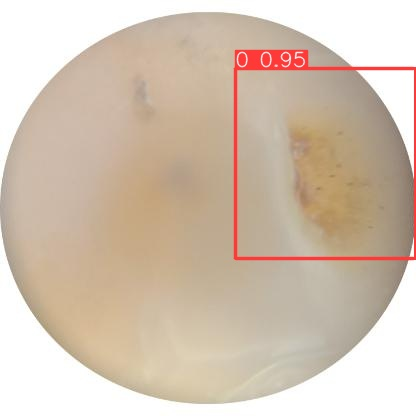

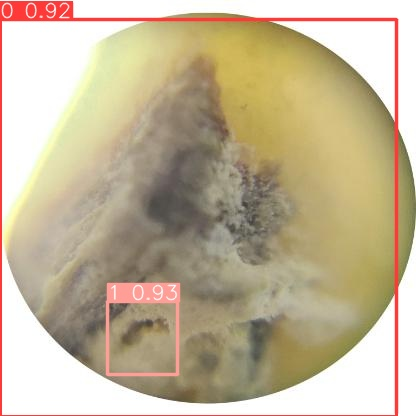

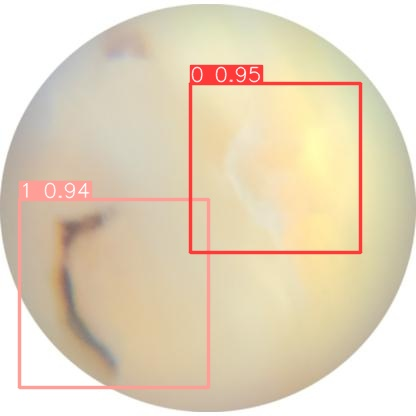

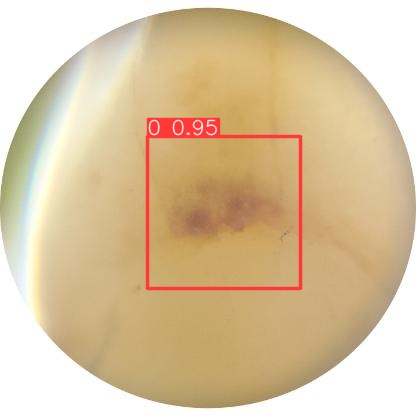

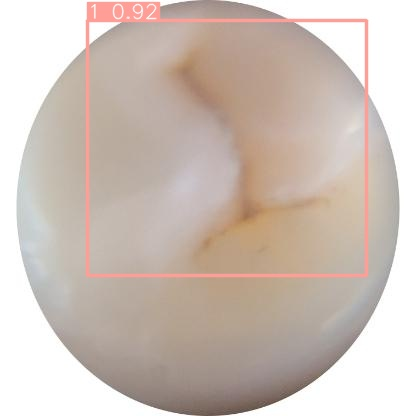

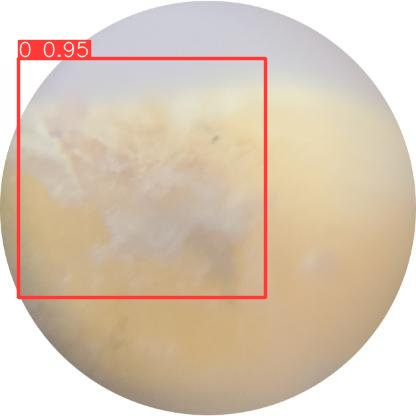

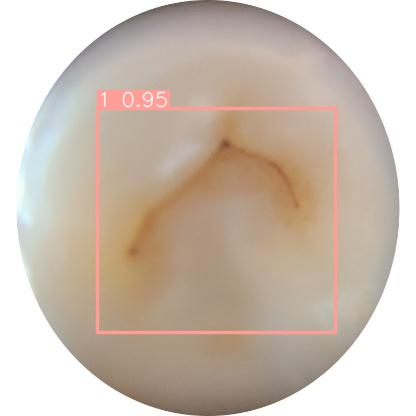

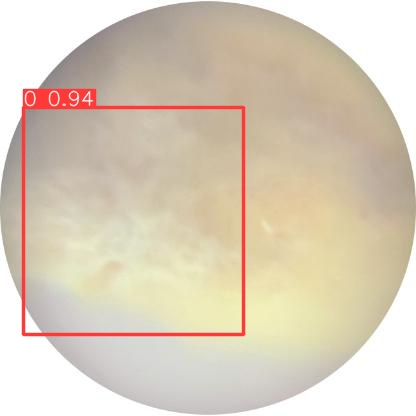

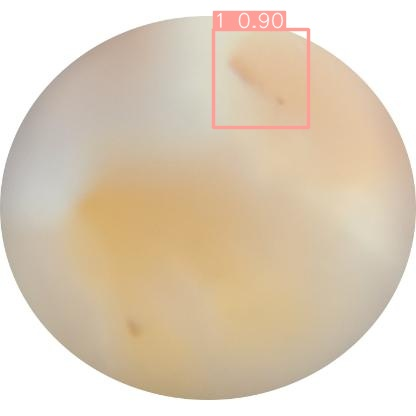

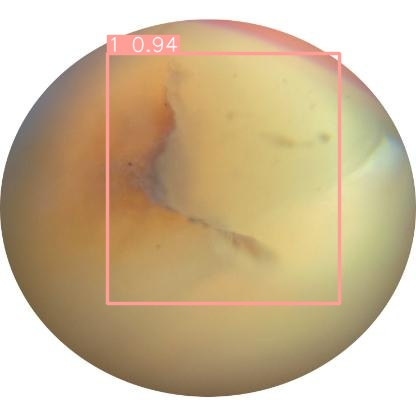

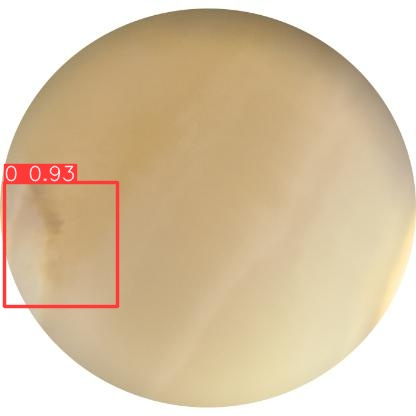

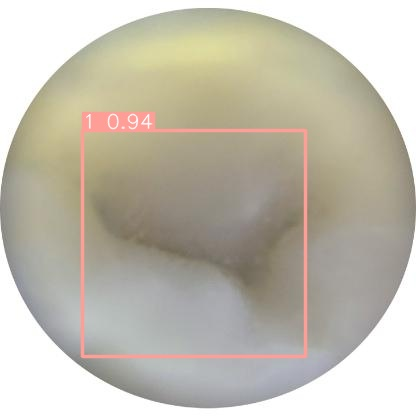

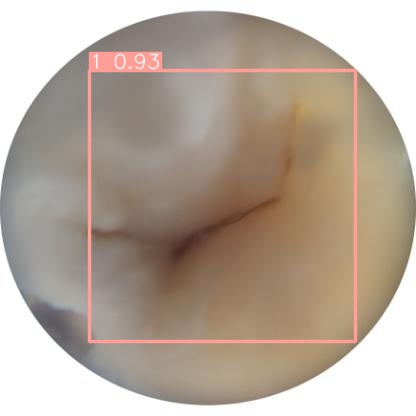

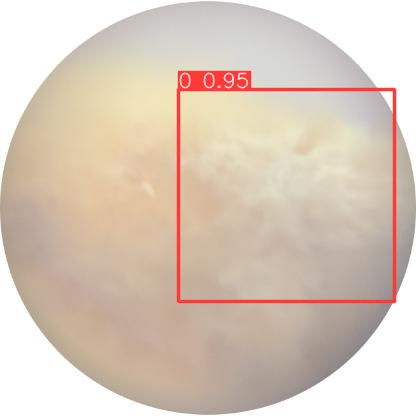

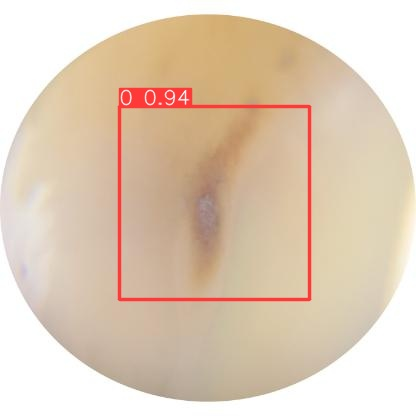

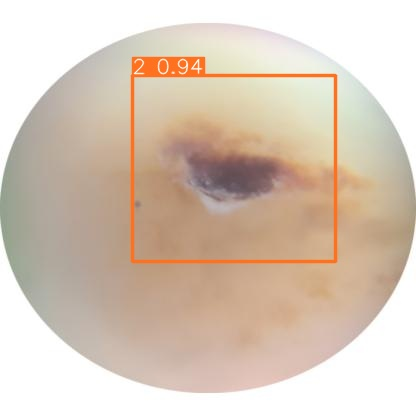

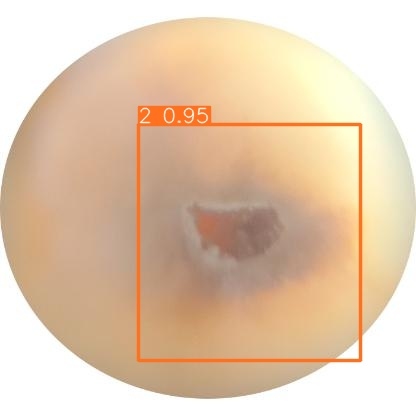

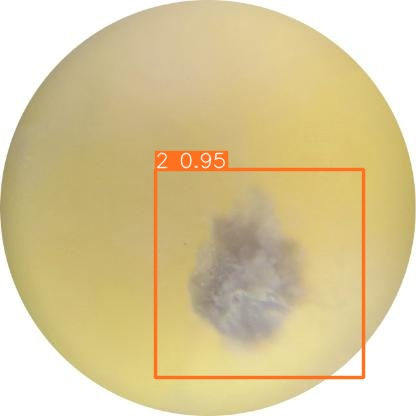

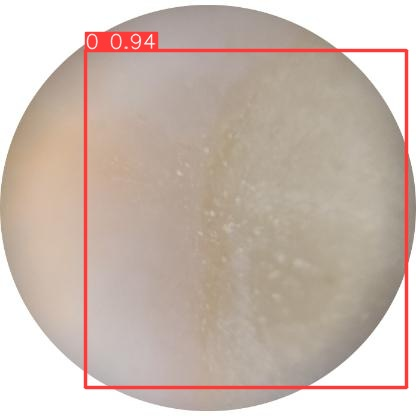

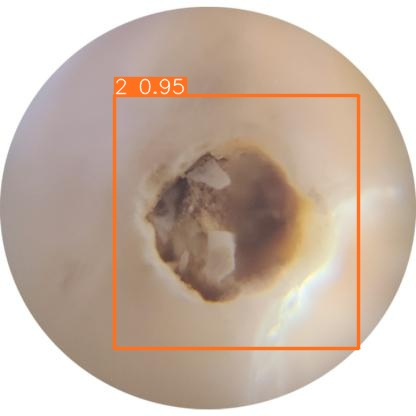

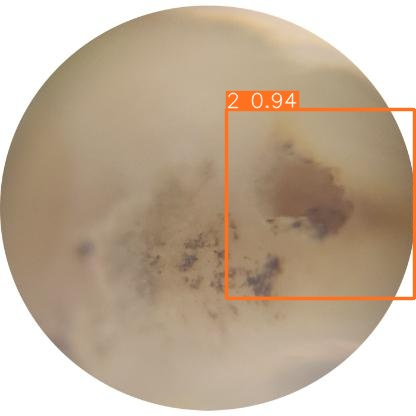

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/Results(yolov6)/inference/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n\n")